## Test

This notebook shows how to get a "cleaned" image and atomic coordinates from a noisy experimental data using a trained pytorch model. Please also refer to a GrapheneAtomFinder notebook in this repository for important details regarding this model's specifics and limitations.

Import modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dcnn
from atomfind import *

Specify filepaths:

In [3]:
# Folder and filename for the saved weights
weights_folder = './saved_models/'
weights_file = 'G-test-4-1-best_weights.pt'

# Folder and filename for the experimental image
image_folder = 'exp_data/'
image_file = 'G-Si-2nm.npy'

Load model:

In [4]:
# Load model skeleton
model = dcnn.atomsegnet()
# Load trained weights
model = dcnn.load_torchmodel(weights_folder+weights_file, model)

Load experimental data:

In [5]:
#Load image as numpy array
imgdata = np.load(image_folder+image_file)

Apply a trained model to the experimental data and extract atomic coordinates

In [6]:
# Apply a trained model to the loaded data
img, dec = dl_image(imgdata, model).decode()

# Get atomic coordinates:
coord = find_atoms(dec).get_all_coordinates()

1 image was decoded in approximately 0.43 seconds
Atomic/defect coordinates extracted


Save the results:

In [7]:
np.save(image_folder+image_file+'-dec.npy', img)
np.save(image_folder+image_file+'-coord.npy', coord)
print('Neural network output and atomic coordinates saved to disk')

Neural network output and atomic coordinates saved to disk


Plot the results:

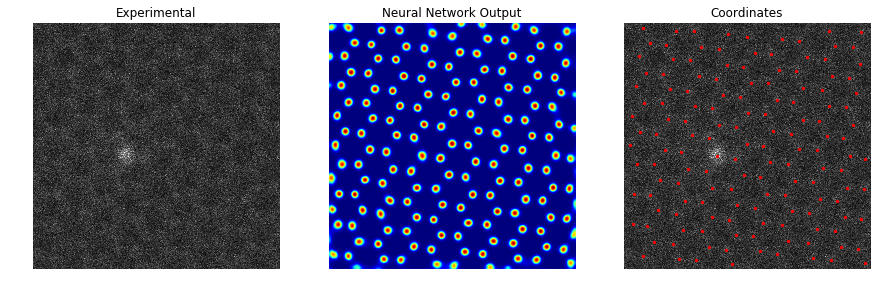

In [10]:
# Plot results ( for image stack (movie), plots the first image (frame) )
k = 0
y, x,_ = coord[0].T
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1.imshow(img[k,:,:,0], cmap = 'gray')
ax1.set_title('Experimental')
ax2.imshow(dec[k,:,:,0], cmap = 'jet', Interpolation = 'Gaussian')
ax2.set_title('Neural Network Output')
ax3.imshow(img[k,:,:,0], cmap = 'gray')
ax3.scatter(x, y, s = 5, c = 'red')
ax3.set_title('Coordinates')
for ax in [ax1, ax2, ax3]:
    ax.axis('off')
plt.show()